In [271]:
from parameters import Parameters
from model_coverage import KeywordCoverage
import pandas as pd
params = Parameters()
from torch.utils.data import DataLoader
import ast
from tqdm import tqdm
import numpy as np
from transformers import DistilBertForMaskedLM
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

In [298]:
model = GPT2LMHeadModel.from_pretrained('distilgpt2')
tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2', pad_token='<|pad>')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [329]:
texts = ["""A prewar Rosario Candela architectural masterpiece, this sun-flooded corner 14 into 11 room grand duplex was expertly renovated by renowned architect Mary Burnham of MBB Architects in partnership with designer Rachel Laxer and home builder Josh Weiner of Silver Lining. The largest home in the building, Apartment 10/11A has five bedrooms, five full bathrooms and two powder rooms. The residence has undergone a complete state-of-the-art restoration and modernization with every room being completely gutted and put back together with no expense being spared and utilizing the best of materials and systems while restoring the elegance of historic details. Perfect for both entertaining and everyday living, there are ceilings up to 10' 8", two wood burning fireplaces, a balcony, raised doorways, perfectly restored original oak wood flooring as well as new rift quarter sawn white oak flooring, new windows, custom millwork, plaster moldings, bespoke E.R. Butler & Co. hardware, specialty paint finishes, and radiant heat in the kitchen, mud room and all bathrooms. All mechanical elements of this sophisticated home have been fully modernized including new electrical, new plumbing and a state-of-the-art Savant Pro Home Technology system which integrates the extensive audio/video components, Lutron lighting system, motorized shades and HVAC. The Savant system allows you to control the entire home through your cell phone or the multiple iPads in the residence. There is a five-zone HVAC system with temperature controlled zones for AC and each room having a control for heat. The home has Cat5e cabling, a Panasonic phone and intercom system, wired WAPs throughout for excellent WiFi connectivity, in-ceiling speakers throughout and it is wired for televisions in seven rooms. A semi-private elevator landing opens onto a regal 31-foot long entrance gallery that spans the beautiful enfilade of formal spaces which face south, east and west. Off the gallery is an exquisite powder room, an oversized coat closet, and a discreet china closet hidden under the staircase. The sun-drenched living room boasts three oversized windows which face south. This magnificent room is 28' 7" by 20' 2" and has the first wood burning fireplace. Adjacent is a palatial 26-foot long corner library with four windows facing south and east which has been meticulously restored and has the original distinguished wood paneling, original Tudor style plaster molded ceiling and frieze, and the second wood burning fireplace. Next is a corner formal dining room which has been transformed into an incredible entertainment room which has four windows facing south and west and has a built-in banquette for dining. The corner eat-in kitchen is open to this room and can be closed off by concealed pocket doors if you want to formally entertain. The kitchen has custom Bulthaup cabinetry, quartzite countertops by Walker Zanger, porcelain tile flooring by Fibra Collection, and a center island clad in a Luce Di Luna slab with seating. It is equipped with top-of-the-line appliances including a Subzero refrigerator and two freezer drawers, a Subzero wine refrigerator, two Subzero refrigerator drawers, two Gaggenau ovens, a Gaggenau five burner range with a vented hood, a Gaggenau warming drawer, two Miele dishwashers, a Franke sink and an endless amount of storage. Off of the kitchen is an incredible large windowed mudroom with built-in wood storage lockers and shelving as well as a second windowed powder room, a balcony and a back staircase leading to the 11th floor.""",
            """Spacious 3 bedroom, 2 bathroom home with beautiful East River views and oversized balcony with direct access from both living room and primary bedroom. Large kitchen with pass-through to living room. Living room with plenty of room for dining, piano and more!
Primary bedroom is almost 400 sq ft and could accommodate a king sized bed, sitting room and home office. Closets are abundant and one walk-in could easily convert to 3rd bathroom or laundry room.
Two additional bedrooms could also accommodate king sized beds, desks etc. 
W/D allowed. Cats & Dog friendly. 45 East End Ave permits up to 65% Financing."""]
input_ids = [tokenizer.encode(text, return_tensors='pt', truncation=True, max_length=params.max_input_length) for text in texts]

In [332]:
input_lengths = [len(input_id[0]) for input_id in input_ids]
outputs = [model.generate(input_id, do_sample=True, top_k=50, max_new_tokens=40)[0] for input_id in input_ids]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [333]:
input_lengths

[471, 131]

In [334]:
tokenizer.decode(outputs[0][input_lengths[0]:])

'\' 3″ by 21\' 2" and has a white oak roof providing additional lighting throughout. The interior and exterior are beautifully china-fenced and custom designed over a 2.5" cast'

In [328]:
input_lengths[0]

1

In [297]:
outputs = [mod.generate(inpids[0], do_sample=True, max_length=40, top_k=50) for inpids in inputs]
out = [tok.decode(output[0], skip_special_tokens=True) for output in outputs]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


IndexError: too many indices for tensor of dimension 2

In [259]:
outputs[0][0]

tensor([ 1212, 14081,  1440, 14043,  1115, 12436,  1363,   318, 22765,  1474,
         7932,  4266,    11, 14860,    11,   290, 35468,   287,   530,   286,
         9533,   338,  6000, 12815,    13,   383,  4950,  1363,   468,  3170,
          262,  1524,   329,   663,  2444,    11, 12829,   290,  3085,   422])

In [219]:
z = tok(["""A prewar Rosario Candela architectural masterpiece, this sun-flooded corner 14 into 11 room grand duplex was expertly renovated by renowned architect Mary Burnham of MBB Architects in partnership with designer Rachel Laxer and home builder Josh Weiner of Silver Lining. The largest home in the building, Apartment 10/11A has five bedrooms, five full bathrooms and two powder rooms. The residence has undergone a complete state-of-the-art restoration and modernization with every room being completely gutted and put back together with no expense being spared and utilizing the best of materials and systems while restoring the elegance of historic details. Perfect for both entertaining and everyday living, there are ceilings up to 10' 8", two wood burning fireplaces, a balcony, raised doorways, perfectly restored original oak wood flooring as well as new rift quarter sawn white oak flooring, new windows, custom millwork, plaster moldings, bespoke E.R. Butler & Co. hardware, specialty paint finishes, and radiant heat in the kitchen, mud room and all bathrooms. All mechanical elements of this sophisticated home have been fully modernized including new electrical, new plumbing and a state-of-the-art Savant Pro Home Technology system which integrates the extensive audio/video components, Lutron lighting system, motorized shades and HVAC. The Savant system allows you to control the entire home through your cell phone or the multiple iPads in the residence. There is a five-zone HVAC system with temperature controlled zones for AC and each room having a control for heat. The home has Cat5e cabling, a Panasonic phone and intercom system, wired WAPs throughout for excellent WiFi connectivity, in-ceiling speakers throughout and it is wired for televisions in seven rooms. A semi-private elevator landing opens onto a regal 31-foot long entrance gallery that spans the beautiful enfilade of formal spaces which face south, east and west. Off the gallery is an exquisite powder room, an oversized coat closet, and a discreet china closet hidden under the staircase. The sun-drenched living room boasts three oversized windows which face south. This magnificent room is 28' 7" by 20' 2" and has the first wood burning fireplace. Adjacent is a palatial 26" sits one of the tenants of tenants of two are the tenants of which are the tenants of tenants of which the tenants of tenants. They are waiting for the opportunity to hear of two tenants' of"""])

In [222]:
len(z.input_ids[0])

511

In [176]:
msgs = df.msg_clean
clicks = df.clicks
hotwords = Counter()
freqs = Counter()
s = 0
STOP_WORDS = nltk.corpus.stopwords.words('english')
median_n_clicks = {}
for msg,n_clicks in tqdm(list(zip(msgs,clicks))):
    if isinstance(msg,str) and isinstance(n_clicks,float) and n_clicks>0:
        words = nltk.tokenize.word_tokenize(msg.lower())
        for word in set(words) - set(STOP_WORDS):
            if len(word)>2 and word.isalpha():
                hotwords[word] += n_clicks
                s += n_clicks
                if not word in median_n_clicks.keys():
                    median_n_clicks[word] = []
                median_n_clicks[word].append(n_clicks)
        for word in words:
            if len(word)>2 and word.isalpha() and not word in STOP_WORDS:
                freqs[word] += 1
                
hotwords = {key:clicks/s for key,clicks in hotwords.items()}
freqs = {key:cnt/sum(freqs.values()) for key,cnt in freqs.items()}
        

100%|██████████| 111923/111923 [00:22<00:00, 4995.21it/s]


In [182]:
median_n_clicks = {word:np.median(vals) for word,vals in median_n_clicks.items() if len(vals)>10}
median_n_clicks = {word:val/sum(median_n_clicks.values()) for word,val in median_n_clicks.items()}

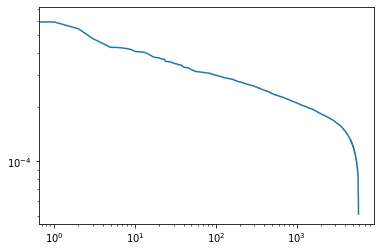

In [183]:
words, vals = zip(*Counter(median_n_clicks).most_common())
plt.plot(vals)
plt.xscale('log')
plt.yscale('log')

Text(0.5, 1.0, 'Normalized hotness')

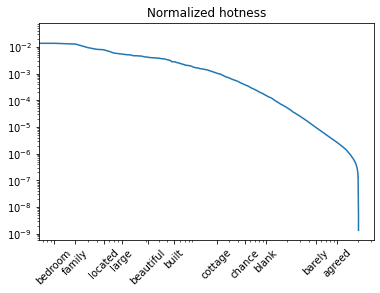

In [167]:
words, vals = zip(*Counter(hotwords).most_common())
# words = 
plt.plot(vals)
i = [1, 2, 5, 9, 21, 50, 200, 500, 1001, 5000, 10000]
plt.xscale('log')
plt.yscale('log')
plt.xticks(ticks=i, labels=[words[x] for x in i], rotation=45)
plt.title('Normalized hotness')

In [185]:
med_words[:10]

('flexi',
 'bickley',
 'kalamunda',
 'kiwifruit',
 'exploration',
 'hollister',
 'sometimes',
 'killester',
 'fed',
 'conditions')

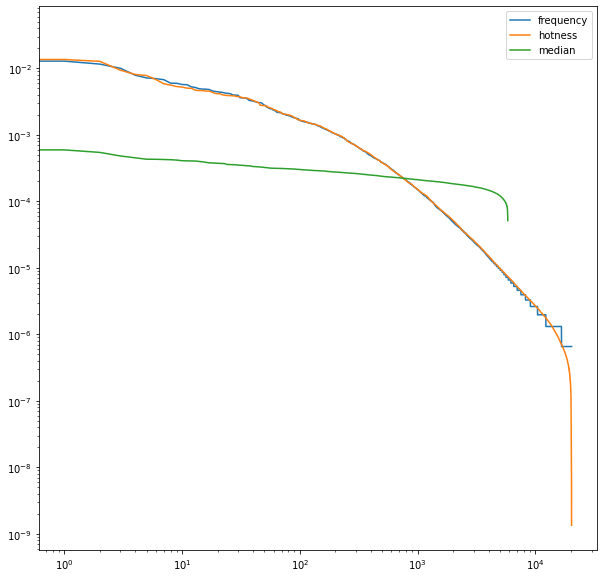

In [184]:
freq_words, freq_vals = zip(*Counter(freqs).most_common())
med_words, med_vals = zip(*Counter(median_n_clicks).most_common())
hot_words, hot_vals = zip(*Counter(hotwords).most_common())

plt.figure(figsize=(10,10))
plt.plot(freq_vals, label='frequency')
plt.plot(hot_vals, label='hotness')
plt.plot(med_vals, label='median')
plt.yscale('log')
plt.xscale('log')
plt.legend()

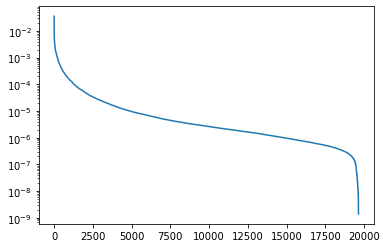

In [75]:
plt.plot(vals)
plt.yscale('log')

In [44]:
df = pd.read_csv(params.dataset_filename, low_memory=False)
n_words = {}
n_words['msg'] = []
n_words['desc'] = []
n_words['desc_msg_strip'] = []
for msg in tqdm(df.msg_clean[[isinstance(x,str) for x in df.msg_clean]]):
    n_words['msg'].append(len(nltk.tokenize.word_tokenize(msg)))
for desc in tqdm(df.desc_clean[[isinstance(x,str) for x in df.desc_clean]]):
    n_words['desc'].append(len(nltk.tokenize.word_tokenize(desc)))
for desc in tqdm(df.desc_clean_msg_stripped[[isinstance(x,str) for x in df.desc_clean_msg_stripped]]):
    n_words['desc_msg_strip'].append(len(nltk.tokenize.word_tokenize(desc)))


100%|██████████| 49384/49384 [00:47<00:00, 1041.93it/s]


(0.0, 512.0)

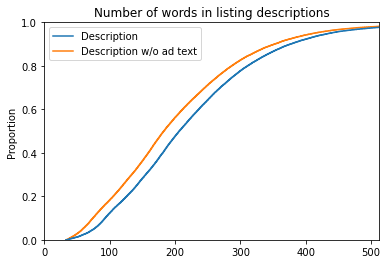

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
n_words_tmp = {'Description':n_words['desc'], 'Description w/o ad text':n_words['desc_msg_strip']}
sns.ecdfplot(n_words_tmp,ax=ax)
# sns.ecdfplot(n_words['desc_msg_strip'],ax=ax)
# plt.xlabel('Number of words')
plt.title('Number of words in listing descriptions')
plt.xlim((0,512))
# ax2 = ax.twinx()
# sns.ecdfplot(n_words['desc'],ax=ax2)
# plt.ylabel('')


In [37]:
z = sns.ecdfplot(n_words['msg'],ax=ax)
z.

AttributeError: 'AxesSubplot' object has no attribute 'show'

In [7]:
print('msgs', sum([isinstance(x,str) for x in df.msg_clean]))
print('descs', sum([isinstance(x,str) and len(x) > 20 for x in df.desc_clean_msg_stripped]))
print('both', sum([isinstance(msg,str) and isinstance(desc,str) for msg,desc in zip(df.msg_clean, df.desc_clean_msg_stripped)]))

msgs 104466
descs 49384
both 42128


In [161]:
with open(params.hotwords_filename,'r') as f:
    hotwords = {}
    s = 0.0
    for line in f.readlines():
        token = int(line.split(',')[0])
        word = line.split(',')[1]
        val = line.split(',')[2][:-1]
        hotwords[token] = {'word':word, 'val':float(val)}
        s += float(val)
    for key in hotwords.keys():
        hotwords[key]['val'] /= s

In [158]:
dic = {'1':1,'2':2,'3':3}

In [162]:
hot_words = [hotwords[token]['word'] for token in hotwords.keys()]
hot_vals = [hotwords[token]['val'] for token in hotwords.keys()]

In [1]:
df = pd.read_csv(params.dataset_filename, low_memory=False)
good_idxs = np.asarray([isinstance(x,str) for x in df.desc_clean]) * np.asarray([isinstance(x,str) for x in df.msg_clean])
descs = df.desc_clean[good_idxs]
msgs = df.msg_clean[good_idxs]
scores_potential = []
scores_realized = []
for desc,msg in tqdm(list(zip(descs, msgs))):
    score_pot = 0
    score_rel = 0
    for word,val in zip(hot_words, hot_vals):
        if word in desc.lower():
            score_pot += val
            if word in msg.lower():
                score_rel += val
    scores_potential.append(score_pot)
    scores_realized.append(score_rel)

NameError: name 'pd' is not defined

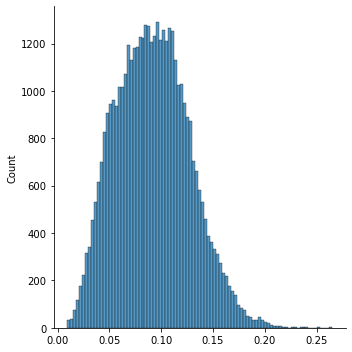

In [166]:
sns.displot(scores_potential)

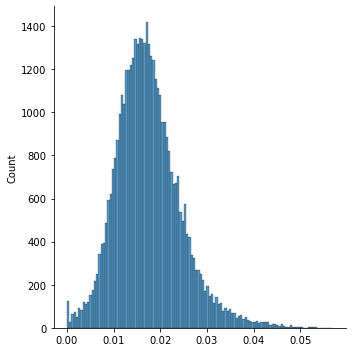

In [167]:
sns.displot(scores_realized)

In [127]:
from transformers import BertTokenizer, GPT2Tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('distilbert-base-uncased')
gpt2_tokenizer = GPT2Tokenizer.from_pretrained('distilgpt2')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [131]:
bert = 0
gpt2 = 0
for key in hotwords.keys():
    if bert_tokenizer.decode([key]) == hotwords[key]['word']:
        bert += 1
    if gpt2_tokenizer.decode([key]) == hotwords[key]['word']:
        gpt2 += 1

In [133]:
bert / len(hotwords)

1.0

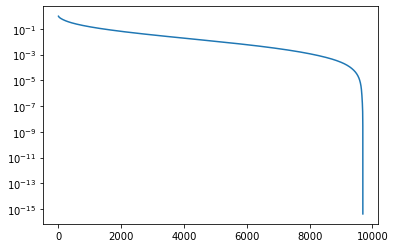

In [116]:

plt.plot([hotwords[token]['val'] for token in hotwords.keys()])
plt.yscale('log')

In [66]:
corpus = [x for x in df.desc_clean if isinstance(x,str)]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [85]:
X = Counter([1,2,3,4,5,4])
x,y=zip(*X.most_common())

In [88]:
X[4]

2

In [87]:
y

(2, 1, 1, 1, 1)

In [6]:
import time
600/1.5

400.0

In [2]:
import torch
torch.nn.functional.relu(torch.Tensor([1,2,3,4])-torch.Tensor([0,-3,4,2]))

tensor([1., 5., 0., 2.])

In [11]:
kw_cov = KeywordCoverage(_type='')
kw_cov.bert = DistilBertForMaskedLM.from_pretrained('C:/Users/Colton/OneDrive/School/Thesis/Adfenix/play/models/2022-04-11/coverage/model_5').to('cuda')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizer'.


Loaded fine-tuned coverage model, tokenizer


In [15]:
df = pd.read_csv(params.dataset_filename, low_memory=False)
df.head()

,Unnamed: 0,name,path,desc,uid,hqguid,propertyguid,campaignguid,msg,imps,clicks,_merge,msg_clean,desc_clean,desc_clean_msg_stripped,msg_words_pos,desc_clean_msg_stripped_words_pos,desc_clean_msg_stripped_locs,mask_hotwords,mask_locs
0,0,barryplant,C:/Users/Colton/OneDrive/School/Thesis/Adfenix...,This well-presented 3BR home is in a terrific ...,100002,55c8269a-0096-449d-ab3c-045ee569204c,f90e4696-e13c-4e25-b937-c1334e5cfb2b,095adbf2-cdc7-48dd-be59-d7f81f5de454,This well-presented 3BR home is in a terrific ...,4176.0,567.0,both,This well-presented 3BR home is in a terrific ...,This well-presented 3BR home is in a terrific ...,Surrounded by lush sub-tropical plants and hig...,"[('well-presented', 'JJ'), ('3br', 'CD'), ('ho...","[('surrounded', 'VBN'), ('lush', 'JJ'), ('sub-...","[{'entity_group': 'MISC', 'score': 0.9864088, ...","['front', 'room', 'kitchen', 'back', 'house', ...",['Southland']
1,1,barryplant,C:/Users/Colton/OneDrive/School/Thesis/Adfenix...,If you are looking for a property with no Body...,100012,55c8269a-0096-449d-ab3c-045ee569204c,284b947b-33a7-4250-9034-4120cf63c597,6c1ef56d-1748-4645-a310-ce012e8c47d2,If you are looking for a property with no Body...,6011.0,987.0,both,If you are looking for a property with no Body...,If you are looking for a property with no Body...,Located only 100 metres to Northland shopping ...,"[('looking', 'VBG'), ('property', 'NN'), ('bod...","[('located', 'VBN'), ('100', 'CD'), ('metres',...","[{'entity_group': 'LOC', 'score': 0.99110895, ...","['much', 'ideal', 'families', 'lovingly', 'upd...",['Northland']
2,2,barryplant,C:/Users/Colton/OneDrive/School/Thesis/Adfenix...,"If you are looking for a single level haven, t...",100012,55c8269a-0096-449d-ab3c-045ee569204c,284b947b-33a7-4250-9034-4120cf63c597,6c1ef56d-1748-4645-a310-ce012e8c47d2,If you are looking for a property with no Body...,6011.0,987.0,both,If you are looking for a property with no Body...,"If you are looking for a single level haven, t...",Located only 100 metres to Northland shopping ...,"[('looking', 'VBG'), ('property', 'NN'), ('bod...","[('located', 'VBN'), ('100', 'CD'), ('metres',...","[{'entity_group': 'LOC', 'score': 0.99308157, ...","['school', 'convenience', 'updated', 'timber',...",['Northland']
3,3,barryplant,C:/Users/Colton/OneDrive/School/Thesis/Adfenix...,If you like local convenience on your doorstep...,100024,55c8269a-0096-449d-ab3c-045ee569204c,5331ae67-30d4-4d55-ab63-fc60a29206d0,6bb68c3c-f10a-4556-97ff-13fd360e6eb4,If you like local convenience on your doorstep...,1172.0,130.0,both,If you like local convenience on your doorstep...,If you like local convenience on your doorstep...,Situated on the turning point of Miller street...,"[('like', 'VBP'), ('local', 'JJ'), ('convenien...","[('situated', 'VBN'), ('turning', 'VBG'), ('po...","[{'entity_group': 'LOC', 'score': 0.56548375, ...","['cafes', 'high', 'way', 'presents', 'investor...",['Gilbert']
4,4,barryplant,C:/Users/Colton/OneDrive/School/Thesis/Adfenix...,Nestled securely at the rear of a small block ...,100056,55c8269a-0096-449d-ab3c-045ee569204c,08eee5a6-ceba-42d8-b957-b141f68a3bb5,2f6db776-f9ff-4b28-9a1b-caf8fecfdea1,Nestled securely at the rear of a small block ...,3483.0,755.0,both,Nestled securely at the rear of a small block ...,Nestled securely at the rear of a small block ...,"Inside, the neatly-presented interiors begin w...","[('nestled', 'VBN'), ('securely', 'RB'), ('rea...","[('inside', 'NNP'), ('neatly-presented', 'JJ')...","[{'entity_group': 'LOC', 'score': 0.8094617, '...","['lots', 'space', 'step', 'private', 'areas', ...",[]


In [46]:
doc_freq = Counter()
STOP_WORDS = set(["'",'..', '...', '#', '%', '+', ".", "!", "?", ",", '"', '-', ')', '(', 'we', 'our', 'you', 'he', 'him', 'she', 'her', 'it', "it's", 'its', 'they', 'their', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'a', 'an', 'the', 'and', 'or', 'as', 'of', 'at', 'by', 'to', 'not', 'so', "'s", "in", "for", "with", "on", "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])
N = 0
for desc in tqdm(df.desc_clean, desc='idf'):
    if isinstance(desc, str):
        N += 1
        doc_freq.update(set([word.lower() for word in nltk.tokenize.word_tokenize(desc)]) - STOP_WORDS)
        

idf: 100%|██████████| 111923/111923 [00:56<00:00, 1964.01it/s]


In [94]:
tfidf = []
for desc in tqdm(df.desc_clean, desc='tfidf'):
    if isinstance(desc, str):
        tokenized = nltk.tokenize.word_tokenize(' '.join(desc.split(' ')[:500]))
        tf = Counter([word.lower() for word in tokenized if not word.lower() in STOP_WORDS and len(word)>2 and word.isalpha()])
        tmp = {}
        n = len(tokenized)
        for word,freq in tf.items():
            tmp[word] = {'tf':freq/n, 'df':doc_freq[word], 'tfidf': (freq / n) * np.log(N / (1+doc_freq[word]))}
        vals = [tmp[key]['tfidf'] for key in tmp.keys()]
        words = list(tmp.keys())
        idx = np.argsort(vals)
        idx = np.flip(idx)
        tfidf.append([words[i] for i in idx])
                         
                         

tfidf: 100%|██████████| 111923/111923 [01:06<00:00, 1685.36it/s]  


In [96]:
counts = Counter([item for sublist in tfidf for item in sublist[:10]])
# n_masks = Counter()
# for sublist in tfidf:
    

In [110]:
print('\n'.join([x[0] for x in counts.most_common() if len(x[0])>3]))

brooklyn
dublin
apartment
features
east
beach
west
custom
unit
auction
ocean
prospect
community
association
river
avenue
condo
windowed
updated
hill
slope
loft
newer
building
terrace
lake
marble
development
measurements
doncaster
duplex
condominium
information
glen
attic
heights
rates
townhouse
complex
land
prewar
remuera
click
mooroolbark
mount
coop
cottage
total
none
remodeled
original
plus
hours
studio
manhattan
zone
renovated
number
harbor
chelsea
square
level
safety
rear
house
detached
golf
metres
approx
hudson
eltham
villa
school
stca
town
upper
ranch
closet
auctioned
build
country
village
recommend
sponsor
croydon
waverley
health
waterfront
essendon
inspection
pool
flat
south
vaulted
clinton
nice
brisbane
register
lower
southbank
melbourne
riverside
park
section
knox
disappointment
lincoln
extended
online
contained
road
court
granny
greenwich
blacktown
southampton
upgraded
lots
downtown
williamsburg
richmond
tauranga
lane
update
penthouse
club
madison
allowed
score
center
site
e

In [4]:
df = pd.read_csv(params.dataset_filename, low_memory=False)
good_idxs = df.index[np.array([isinstance(x, str) for x in df.desc_clean_msg_stripped]) * np.array([isinstance(x,str) for x in df.msg_clean])]
descs = df.desc_clean_msg_stripped[good_idxs]
msgs = df.msg_clean[good_idxs]
locs = [ast.literal_eval(x) for x in df.desc_clean_msg_stripped_locs[good_idxs]]
def collate_func(triplets):
    return list(zip(*triplets))

In [5]:
dataset = [(desc, msg, loc) for desc,msg,loc in zip(descs, msgs, locs)]
diffs = []
withouts = []
for batch in tqdm(DataLoader(dataset=dataset, batch_size=22, drop_last=True, collate_fn=collate_func)):
    batch_descs, batch_msgs, batch_locs = batch
    x, y = kw_cov.score_non_threaded(batch_msgs, batch_descs, batch_locs)
    for item in x:
        diffs.append(float(item))
    for item in y:
        withouts.append(float(item))

100%|██████████| 1914/1914 [46:44<00:00,  1.47s/it]


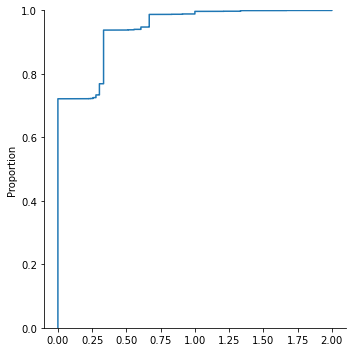

In [19]:
sns.displot([diff/.3 if diff > 0 else 0 for diff in diffs], kind='ecdf')

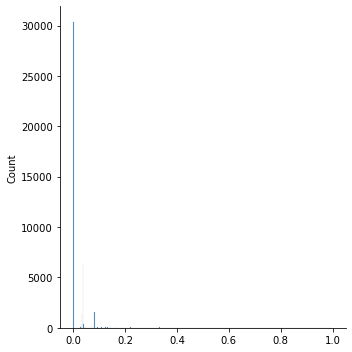

In [18]:
normd = [diff/without for diff,without in zip(diffs,withouts) if without!=0]
normd = [x/3 if x>0 else 0 for x in normd]
sns.displot(normd)

In [13]:
np.mean(normd)

0.03955641696037269

In [15]:
np.min(normd)

-1.0

In [2]:
vals_normd = np.zeros((13,13))
vals_simpd = np.zeros((13,13))
vals_normd_list, vals_simpd_list = [], []
xs, ys = [], []
for ix,x in enumerate(range(13)):
    for iy,y in enumerate(range(13)):
        if not y==0:
            vals_normd[iy,ix] = ( (ix/12)-(iy/12) ) / (iy/12)
            vals_normd_list.append(vals_normd[iy,ix])
        else:
            vals_normd_list.append(0)
        vals_simpd[iy,ix] = ix/12 - iy/12
        vals_simpd_list.append(vals_simpd[iy,ix])
        xs.append(x)
        ys.append(y)
        

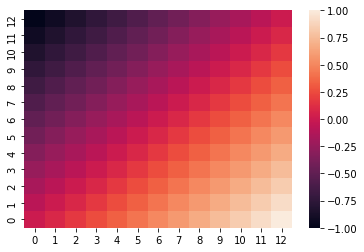

In [15]:
ax = sns.heatmap(vals_simpd)
ax.invert_yaxis()

In [13]:
vals_normd[1]

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [14]:
vals_normd[2]

array([-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,
        4.5,  5. ])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(xs, ys, vals_normd_list)
plt.show()

In [6]:
lens = [10, 20, 30, 40, 50]
n = 1000
rows = []
for length in lens:
    msgs_tmp = [' '.join(msg.split(' ')[:length]) for msg in msgs]
    dataset = [(desc, msg, loc) for desc,msg,loc in zip(descs, msgs_tmp, locs)][:n]
    dl = DataLoader(dataset=dataset, batch_size=22, drop_last=True, collate_fn=collate_func)
    for i,batch in enumerate(tqdm(dl, desc=str(length))):
        batch_descs, batch_msgs, batch_locs = batch
        acc = kw_cov.score_with_only(batch_msgs, batch_descs, batch_locs)
        rows.append([length, acc.mean().item()])
df = pd.DataFrame(rows,columns=['length','score'])

50: 100%|██████████| 45/45 [00:38<00:00,  1.18it/s]


In [7]:
df.corr()

,length,score
length,1.000000,0.163309
score,0.163309,1.000000


In [36]:
df.corr()

,length,score
length,1.00000,0.21683
score,0.21683,1.00000


In [23]:
df = pd.DataFrame(scores)

In [24]:
df

,10,20,30,40,50
0,0.880388,0.897743,0.915925,0.920471,0.920471
1,0.854959,0.864050,0.851240,0.855372,0.855372
2,0.888017,0.901240,0.896694,0.896694,0.896694
3,0.880992,0.867769,0.894628,0.894628,0.894628
4,0.842975,0.869835,0.878926,0.883471,0.883471
5,0.871488,0.894215,0.889669,0.894215,0.894215
6,0.825207,0.838843,0.852479,0.852479,0.852479
7,0.892149,0.914463,0.905372,0.905372,0.905372
8,0.900000,0.916667,0.912121,0.912121,0.912121
9,0.897796,0.900826,0.905372,0.905372,0.905372
